In [49]:
import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.sparse import csr_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_samples, silhouette_score
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

all_data = pd.read_csv(r'C:\Users\Vincelot\Documents\GitHub\Digital_Addiction\Data\submission_and_comments_V3.csv', sep = ";")
data = all_data[(all_data.submission_title != "[deleted by user]") & ~(all_data.submission_title.isna())]

# 1. PCA

In [10]:
def tfidf_clustering_dimreduc(algo):
    vectorizer = TfidfVectorizer(max_df=0.95)  # ignore words with very high doc frequency
    tf_idf = vectorizer.fit_transform(data['submission_title'])
    words = vectorizer.get_feature_names_out()
    tf_idf = csr_matrix(tf_idf)
    tf_idf = normalize(tf_idf)
    tf_idf.todense()
    pca = PCA(n_components=2, random_state=42)
    pca_vecs = pca.fit_transform(tf_idf.toarray())
    x0 = pca_vecs[:, 0]
    x1 = pca_vecs[:, 1]

    if algo == 'kmeans':
        clustering_model = KMeans(n_clusters=3, random_state=42)
        clustering_model.fit(tf_idf)
    elif algo == "gm":
        clustering_model = GaussianMixture(n_components=2, random_state=0)
        clustering_model.fit(tf_idf.toarray())
        
    clusters = clustering_model.labels_
    return x0, x1, clusters



C:\Users\Vincelot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


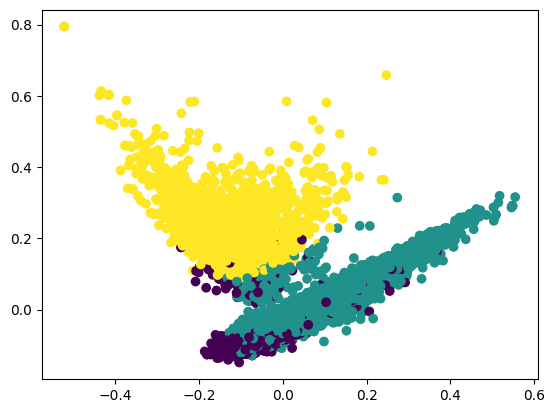

In [11]:
x0_kmeans, x1_kmeans, clusters_kmeans = tfidf_clustering_dimreduc(algo = "kmeans")
plt.scatter(x0_kmeans, x1_kmeans, c=clusters_kmeans)

In [15]:
def tf_idf_dim_reduction_clustering(algo, n_clusters = 2):
    vectorizer = TfidfVectorizer(max_df=0.95)  # ignore words with very high doc frequency
    tf_idf = vectorizer.fit_transform(data['submission_title'])
    words = vectorizer.get_feature_names_out()
    tf_idf = csr_matrix(tf_idf)
    tf_idf = normalize(tf_idf)
    tf_idf.todense()
    pca = PCA(n_components=2, random_state=42)
    pca_vecs = pca.fit_transform(tf_idf.toarray())
    x0 = pca_vecs[:, 0]
    x1 = pca_vecs[:, 1]

    if algo == 'kmeans':
        clustering_model = KMeans(n_clusters = n_clusters, random_state=42)
        clustering_model.fit(pca_vecs)
    elif algo == "gm":
        clustering_model = GaussianMixture(n_components = n_clusters, random_state=0)
        clustering_model.fit(pca_vecs)
        
    clusters = clustering_model.labels_
    return x0, x1, clusters


C:\Users\Vincelot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


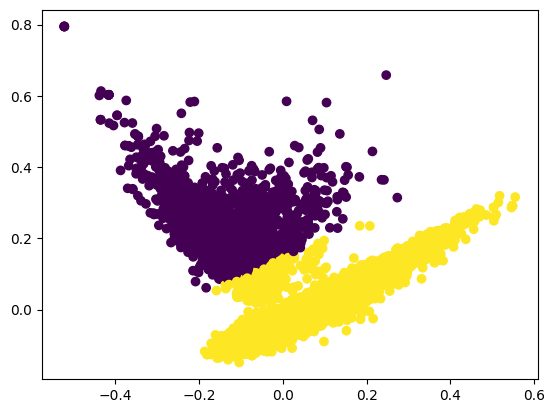

In [16]:
x0_kmeans, x1_kmeans, clusters_kmeans = tf_idf_dim_reduction_clustering(algo = "kmeans")
plt.scatter(x0_kmeans, x1_kmeans, c=clusters_kmeans)

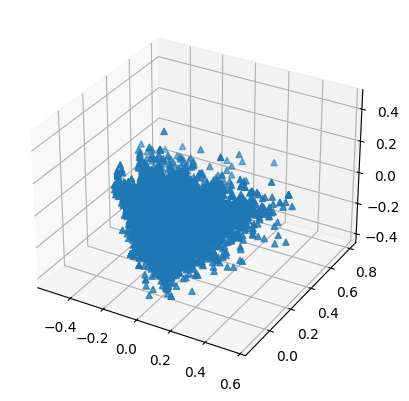

In [19]:
vectorizer = TfidfVectorizer(max_df=0.95)  # ignore words with very high doc frequency
tf_idf = vectorizer.fit_transform(data['submission_title'])
words = vectorizer.get_feature_names_out()
tf_idf = csr_matrix(tf_idf)
tf_idf = normalize(tf_idf)
tf_idf.todense()
pca = PCA(n_components=3, random_state=42)
pca_vecs = pca.fit_transform(tf_idf.toarray())
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]
x2 = pca_vecs[:, 2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x0, x1, x2, marker = "^")
plt.show()

## 2. UMAP

In [29]:
umap_reducer = umap.UMAP(metric = "euclidean", verbose = True, n_neighbors = 200, min_dist = 0)
umap_embedding = umap_reducer.fit_transform(tf_idf)

UMAP(min_dist=0, n_neighbors=200, verbose=True)
Sat May 20 19:48:12 2023 Construct fuzzy simplicial set
Sat May 20 19:48:12 2023 Finding Nearest Neighbors
Sat May 20 19:48:12 2023 Building RP forest with 12 trees
Sat May 20 19:48:14 2023 metric NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	 6  /  14
	 7  /  14
	Stopping threshold met -- exiting after 7 iterations
Sat May 20 20:16:23 2023 Finished Nearest Neighbor Search
Sat May 20 20:16:24 2023 Construct embedding


Epochs completed: 100%| ██████████ 200/200 [00:15]

Sat May 20 20:16:42 2023 Finished embedding


C:\Users\Vincelot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


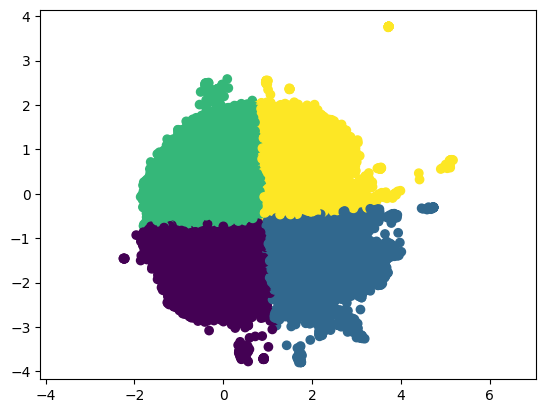

In [40]:
clustering_model = KMeans(n_clusters = 4, random_state=42)
clustering_model.fit(umap_embedding)
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c = clustering_model.labels_)
plt.gca().set_aspect('equal', 'datalim')  #not good --> all points aggregated together apart from a few number of outliers